## Polynomials 3

- Hmm so i tried briefly with Claude to just use nomralized polynomials x^2, x^3, and so on.
- Did not exhibit double descent, could be an implementation issue, not totally sure
- Let me try a 2 layer Relu network real quick, that could be interesting. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim

# Your existing data generation code
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2
n_points=16
noise_level=0.2
n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(5) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

12 4


(-0.5, 2.0)

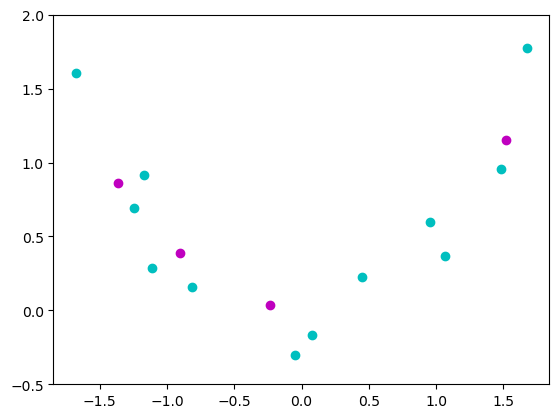

In [2]:
# plt.plot(all_x, all_y)
plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.ylim([-0.5, 2])

/var/folders/w_/_4hnpxr91r78y8gdhv58zlrm0000gn/T/ipykernel_7104/4170677285.py:2: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x_train, y_train, degree)


(-0.5, 2.0)

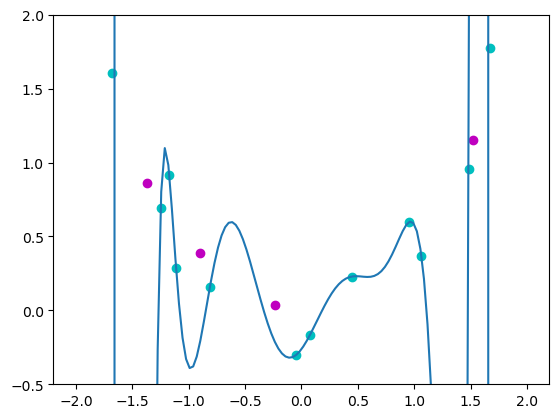

In [3]:
degree=500
coefficients = np.polyfit(x_train, y_train, degree)
all_y_fit = np.polyval(coefficients, all_x)

plt.scatter(x_train, y_train, c='c')
plt.scatter(x_test, y_test, c='m')
plt.plot(all_x, all_y_fit)

plt.ylim([-0.5, 2])

### Hmm What about a 2 layer Relu network?

12 4
Training the neural network...
Epoch [2000/500000], Train Loss: 0.0227, Test Loss: 0.0468
Epoch [4000/500000], Train Loss: 0.0188, Test Loss: 0.0490
Epoch [6000/500000], Train Loss: 0.0163, Test Loss: 0.0478
Epoch [8000/500000], Train Loss: 0.0147, Test Loss: 0.0470
Epoch [10000/500000], Train Loss: 0.0137, Test Loss: 0.0468
Epoch [12000/500000], Train Loss: 0.0131, Test Loss: 0.0469
Epoch [14000/500000], Train Loss: 0.0127, Test Loss: 0.0471
Epoch [16000/500000], Train Loss: 0.0122, Test Loss: 0.0473
Epoch [18000/500000], Train Loss: 0.0118, Test Loss: 0.0475
Epoch [20000/500000], Train Loss: 0.0115, Test Loss: 0.0477
Epoch [22000/500000], Train Loss: 0.0112, Test Loss: 0.0478
Epoch [24000/500000], Train Loss: 0.0110, Test Loss: 0.0479
Epoch [26000/500000], Train Loss: 0.0107, Test Loss: 0.0479
Epoch [28000/500000], Train Loss: 0.0105, Test Loss: 0.0481
Epoch [30000/500000], Train Loss: 0.0102, Test Loss: 0.0482
Epoch [32000/500000], Train Loss: 0.0100, Test Loss: 0.0484
Epoch [3

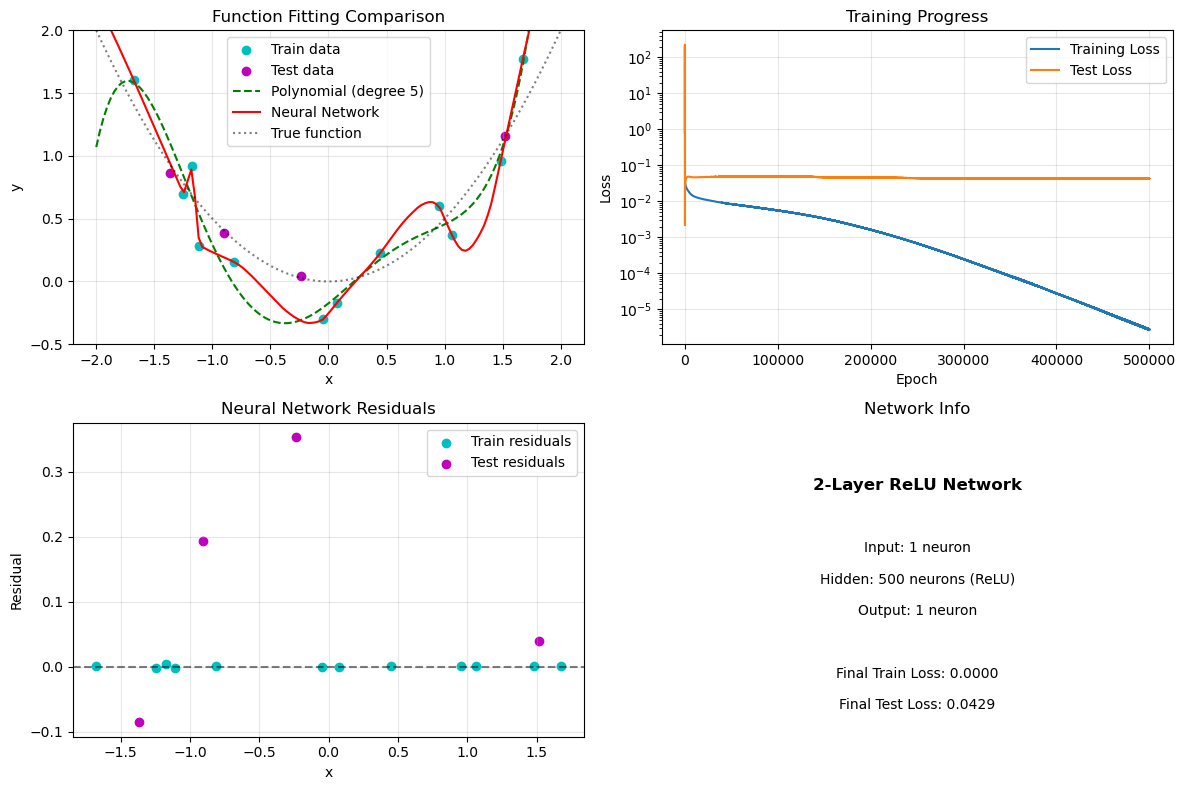


Final Results:
Neural Network - Train Loss: 0.0000, Test Loss: 0.0429
Training completed in 500000 epochs


In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim

# Your existing data generation code
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2
n_points=16
noise_level=0.2
n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(5) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

# Polynomial fit (your existing code)
degree=5
coefficients = np.polyfit(x_train, y_train, degree)
all_y_fit = np.polyval(coefficients, all_x)

# Define 2-layer ReLU network
class TwoLayerNet(nn.Module):
    def __init__(self, hidden_size=20):
        super(TwoLayerNet, self).__init__()
        self.layer1 = nn.Linear(1, hidden_size)  # Input to hidden
        self.layer2 = nn.Linear(hidden_size, 1)  # Hidden to output
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.layer2(x)
        return x

# Convert data to PyTorch tensors
x_train_tensor = torch.FloatTensor(x_train).reshape(-1, 1)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
x_test_tensor = torch.FloatTensor(x_test).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

# Create network and optimizer
hidden_size = 500
model = TwoLayerNet(hidden_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-2)

# Training parameters
num_epochs = 500000
train_losses = []
test_losses = []

print("Training the neural network...")
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    # Calculate test loss
    with torch.no_grad():
        test_outputs = model(x_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
    
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    if (epoch + 1) % 2000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Generate predictions for plotting
all_x_tensor = torch.FloatTensor(all_x).reshape(-1, 1)
with torch.no_grad():
    all_y_nn = model(all_x_tensor).numpy().flatten()

# Plot results
plt.figure(figsize=(12, 8))

# Plot 1: Data and fits
plt.subplot(2, 2, 1)
plt.scatter(x_train, y_train, c='c', label='Train data')
plt.scatter(x_test, y_test, c='m', label='Test data')
plt.plot(all_x, all_y_fit, 'g--', label=f'Polynomial (degree {degree})')
plt.plot(all_x, all_y_nn, 'r-', label='Neural Network')
plt.plot(all_x, all_y, 'k:', alpha=0.5, label='True function')
plt.ylim([-0.5, 2])
plt.xlabel('x')
plt.ylabel('y')
plt.title('Function Fitting Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Training loss
plt.subplot(2, 2, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')

# Plot 3: Residuals
plt.subplot(2, 2, 3)
train_pred = model(x_train_tensor).detach().numpy().flatten()
test_pred = model(x_test_tensor).detach().numpy().flatten()
plt.scatter(x_train, y_train - train_pred, c='c', label='Train residuals')
plt.scatter(x_test, y_test - test_pred, c='m', label='Test residuals')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Neural Network Residuals')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 4: Network architecture visualization
plt.subplot(2, 2, 4)
plt.text(0.5, 0.8, f'2-Layer ReLU Network', ha='center', va='center', fontsize=12, weight='bold')
plt.text(0.5, 0.6, f'Input: 1 neuron', ha='center', va='center', fontsize=10)
plt.text(0.5, 0.5, f'Hidden: {hidden_size} neurons (ReLU)', ha='center', va='center', fontsize=10)
plt.text(0.5, 0.4, f'Output: 1 neuron', ha='center', va='center', fontsize=10)
plt.text(0.5, 0.2, f'Final Train Loss: {train_losses[-1]:.4f}', ha='center', va='center', fontsize=10)
plt.text(0.5, 0.1, f'Final Test Loss: {test_losses[-1]:.4f}', ha='center', va='center', fontsize=10)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.axis('off')
plt.title('Network Info')

plt.tight_layout()
plt.show()

print(f"\nFinal Results:")
print(f"Neural Network - Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")
print(f"Training completed in {num_epochs} epochs")

Hmm ok, I think this 3 layer network thing could be interesting...clearly can take a lot of training steps, probably makes sense to switch to my desktop, man there's a lof things I want to iterate over here...

Claude's try at a legrende alternative.

In [4]:
def create_polynomial_features(x, degree, normalize=True):
    """
    Create polynomial features with optional normalization.
    
    Args:
        x: input array of shape (n_samples,)
        degree: maximum polynomial degree
        normalize: if True, standardize each feature column
    
    Returns:
        features: array of shape (n_samples, degree+1)
    """
    n = len(x)
    features = np.zeros((n, degree + 1))
    
    for d in range(degree + 1):
        features[:, d] = x ** d
    
    if normalize and degree > 0:
        # Standardize each feature column (except the intercept)
        for d in range(1, degree + 1):
            mean = features[:, d].mean()
            std = features[:, d].std()
            if std > 1e-10:  # Avoid division by zero
                features[:, d] = (features[:, d] - mean) / std
    
    return features

In [7]:
X_train = create_polynomial_features(x_train, 5, normalize=True)

In [9]:
X_train

array([[ 1.        , -0.97037929, -0.00516427, -0.58493666, -0.32232413,
        -0.31446563],
       [ 1.        ,  1.35951793,  1.02112947,  1.39625314,  0.87324294,
         1.18510936],
       [ 1.        , -1.02523475,  0.1437069 , -0.68721178, -0.19043479,
        -0.40258999],
       [ 1.        ,  1.53147028,  1.66590692,  2.0088984 ,  1.96698668,
         2.19783784],
       [ 1.        , -0.01355926, -1.32147407,  0.00265719, -0.87520569,
        -0.02703693],
       [ 1.        ,  0.42938065, -1.1107309 ,  0.0408602 , -0.86077603,
        -0.02402131],
       [ 1.        ,  0.98304889, -0.11743894,  0.51690419, -0.41246822,
         0.20305891],
       [ 1.        ,  0.09420787, -1.31797792,  0.00287063, -0.87519671,
        -0.02703653],
       [ 1.        , -0.70171446, -0.61931927, -0.22676194, -0.71740915,
        -0.0869975 ],
       [ 1.        , -1.09346436,  0.33998218, -0.83015582,  0.00499273,
        -0.54103932],
       [ 1.        , -1.47767474,  1.67516744, -2.

In [8]:
x_train

array([-1.11202732,  1.48292922, -1.17312338,  1.67444363, -0.04635524,
        0.44697545,  1.06363143,  0.07367195, -0.81279799, -1.24911509,
       -1.67703492,  0.95376118])

12 4

Fitting polynomial of degree 1000 with gradient descent...
Iteration 0: Loss = 0.774806
Iteration 1000: Loss = 0.022473


/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/opt/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Iteration 2000: Loss = 0.021436
Iteration 3000: Loss = 0.019458
Iteration 4000: Loss = 0.018349

Train MSE: 0.017717
Test MSE: 0.036282


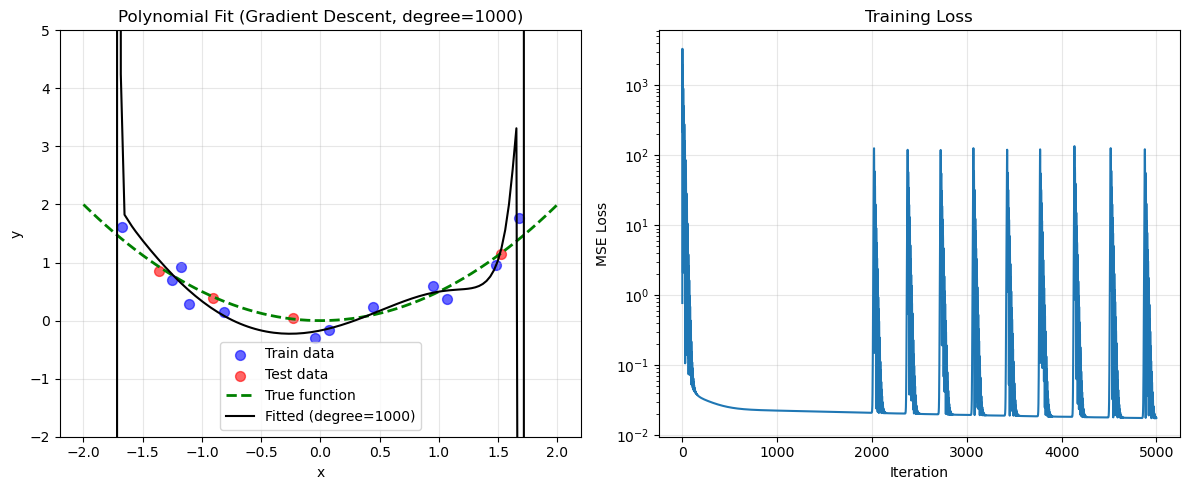


--- Comparison with np.polyfit ---
np.polyfit Test MSE: 9.475678
Gradient Descent Test MSE: 0.036282


In [6]:
import numpy as np 
import matplotlib.pyplot as plt 
import torch
import torch.nn as nn
import torch.optim as optim

# Your existing data generation code
all_x = np.linspace(-2, 2, 128)
all_y = 0.5 * (all_x-0)**2-1
all_y = 0.5*all_x**2
n_points=16
noise_level=0.2
n_train_points=int(np.floor(n_points*0.8))
n_test_points=n_points-n_train_points
print(n_train_points, n_test_points)
                   
np.random.seed(5) #2 is not bad, 5 is not bad
x=np.random.uniform(-2, 2, n_points)
y=0.5*x**2+noise_level*np.random.randn(n_points)
x_train=x[:n_train_points]
y_train=y[:n_train_points]
x_test=x[n_train_points:]
y_test=y[n_train_points:]

def create_polynomial_features(x, degree, normalize=True):
    """
    Create polynomial features with optional normalization.
    
    Args:
        x: input array of shape (n_samples,)
        degree: maximum polynomial degree
        normalize: if True, standardize each feature column
    
    Returns:
        features: array of shape (n_samples, degree+1)
    """
    n = len(x)
    features = np.zeros((n, degree + 1))
    
    for d in range(degree + 1):
        features[:, d] = x ** d
    
    if normalize and degree > 0:
        # Standardize each feature column (except the intercept)
        for d in range(1, degree + 1):
            mean = features[:, d].mean()
            std = features[:, d].std()
            if std > 1e-10:  # Avoid division by zero
                features[:, d] = (features[:, d] - mean) / std
    
    return features

def fit_polynomial_gd(x_train, y_train, degree, 
                      learning_rate=0.01, 
                      n_iterations=10000,
                      regularization=0.0,
                      normalize_features=True,
                      verbose=False):
    """
    Fit polynomial using gradient descent with PyTorch.
    
    Args:
        x_train: training inputs
        y_train: training targets
        degree: polynomial degree
        learning_rate: learning rate for gradient descent
        n_iterations: number of gradient descent iterations
        regularization: L2 regularization strength
        normalize_features: whether to standardize polynomial features
        verbose: print training progress
    
    Returns:
        model: trained PyTorch model
        feature_stats: dict with normalization statistics
    """
    # Create polynomial features
    X_train = create_polynomial_features(x_train, degree, normalize=normalize_features)
    
    # Store normalization stats for later use
    feature_stats = {}
    if normalize_features and degree > 0:
        feature_stats['means'] = np.zeros(degree + 1)
        feature_stats['stds'] = np.ones(degree + 1)
        for d in range(1, degree + 1):
            feature_stats['means'][d] = (x_train ** d).mean()
            feature_stats['stds'][d] = (x_train ** d).std()
            if feature_stats['stds'][d] < 1e-10:
                feature_stats['stds'][d] = 1.0
    
    # Convert to PyTorch tensors
    X_tensor = torch.FloatTensor(X_train)
    y_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
    
    # Create a simple linear model (no bias since we have the intercept in features)
    model = nn.Linear(degree + 1, 1, bias=False)
    
    # Initialize weights to small values
    nn.init.normal_(model.weight, mean=0, std=0.01)
    
    # Use Adam optimizer (more stable than vanilla SGD)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=regularization)
    
    # Training loop
    losses = []
    for iteration in range(n_iterations):
        # Forward pass
        predictions = model(X_tensor)
        loss = nn.MSELoss()(predictions, y_tensor)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        losses.append(loss.item())
        
        if verbose and iteration % 1000 == 0:
            print(f"Iteration {iteration}: Loss = {loss.item():.6f}")
    
    return model, feature_stats, losses

def predict_polynomial(x_new, model, degree, feature_stats, normalize_features=True):
    """
    Make predictions with the trained polynomial model.
    
    Args:
        x_new: new input points
        model: trained PyTorch model
        degree: polynomial degree
        feature_stats: normalization statistics from training
        normalize_features: whether features were normalized during training
    """
    # Create features with same normalization as training
    X_new = create_polynomial_features(x_new, degree, normalize=False)
    
    if normalize_features and degree > 0 and feature_stats:
        # Apply the same normalization as training
        for d in range(1, degree + 1):
            if feature_stats['stds'][d] > 1e-10:
                X_new[:, d] = (X_new[:, d] - feature_stats['means'][d]) / feature_stats['stds'][d]
    
    # Convert to tensor and predict
    X_tensor = torch.FloatTensor(X_new)
    with torch.no_grad():
        predictions = model(X_tensor).numpy().flatten()
    
    return predictions

# Fit polynomial with gradient descent
degree = 1000  # Start with a more reasonable degree for testing
print(f"\nFitting polynomial of degree {degree} with gradient descent...")

model, feature_stats, losses = fit_polynomial_gd(
    x_train, y_train, 
    degree=degree,
    learning_rate=0.1,
    n_iterations=5000,
    regularization=1e-6,  # Small regularization for numerical stability
    normalize_features=True,
    verbose=True
)

# Make predictions
all_y_fit_gd = predict_polynomial(all_x, model, degree, feature_stats, normalize_features=True)
y_train_pred = predict_polynomial(x_train, model, degree, feature_stats, normalize_features=True)
y_test_pred = predict_polynomial(x_test, model, degree, feature_stats, normalize_features=True)

# Calculate errors
train_mse = np.mean((y_train - y_train_pred)**2)
test_mse = np.mean((y_test - y_test_pred)**2)
print(f"\nTrain MSE: {train_mse:.6f}")
print(f"Test MSE: {test_mse:.6f}")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot 1: Fitted polynomial
axes[0].scatter(x_train, y_train, color='blue', label='Train data', alpha=0.6, s=50)
axes[0].scatter(x_test, y_test, color='red', label='Test data', alpha=0.6, s=50)
axes[0].plot(all_x, all_y, 'g--', label='True function', linewidth=2)
axes[0].plot(all_x, all_y_fit_gd, 'k-', label=f'Fitted (degree={degree})', linewidth=1.5)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title(f'Polynomial Fit (Gradient Descent, degree={degree})')
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_ylim([-2, 5])  # Limit y-axis for visibility

# Plot 2: Training loss
axes[1].plot(losses)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('MSE Loss')
axes[1].set_title('Training Loss')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare with np.polyfit for reference
print("\n--- Comparison with np.polyfit ---")
coefficients_np = np.polyfit(x_train, y_train, min(degree, n_train_points-1))
all_y_fit_np = np.polyval(coefficients_np, all_x)
y_test_pred_np = np.polyval(coefficients_np, x_test)
test_mse_np = np.mean((y_test - y_test_pred_np)**2)
print(f"np.polyfit Test MSE: {test_mse_np:.6f}")
print(f"Gradient Descent Test MSE: {test_mse:.6f}")